In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [90]:
with open('데이터셋/abalone.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader) #한줄 건너 뛰기
    
    rows = []
    for row in csvreader:
        rows.append(row)
        

In [91]:
input_cnt, output_cnt = 10, 1
data = np.zeros([len(rows), input_cnt + output_cnt])
print(data.shape)

(4177, 11)


In [92]:
for n, row in enumerate(rows):
    if row[0] == 'M' : data[n,0] = 1
    if row[0] == 'F' : data[n,1] = 1
    if row[0] == 'I' : data[n,2] = 1
    data[n, 3:] = row[1:]

In [93]:
train_ratio = 0.8
test_begin_idx = int(data.shape[0]* train_ratio)
print("test_begin_idx: ", test_begin_idx)

test_begin_idx:  3341


In [94]:
np.arange(data.shape[0])

array([   0,    1,    2, ..., 4174, 4175, 4176])

In [95]:
shuffle_map = np.arange(data.shape[0])
np.random.shuffle(shuffle_map)

In [96]:
shuffle_map[:5]

array([2444,  959, 1701,  802, 3632])

In [97]:
shuffle_map[test_begin_idx:].shape

(836,)

In [86]:
test_data = data[shuffle_map[test_begin_idx:]] #픽셀 인덱스 추출
print(test_data.shape)
train_data = data[shuffle_map[:test_begin_idx]]
print(train_data.shape)

(836, 11)
(3341, 11)


In [99]:
train_X, train_Y = train_data[:, :-output_cnt], train_data[:,-output_cnt:]
test_X, test_Y = test_data[:, :-output_cnt], test_data[:,-output_cnt:]

In [88]:
print(train_X.shape)
print(test_X.shape)

print(train_Y.shape)
print(test_Y.shape)

(3341, 10)
(836, 10)
(3341, 1)
(836, 1)


In [13]:
train_x_mean = np.mean(train_X, axis=0)
train_x_std = train_X.std(axis = 0)

In [14]:
#질문 
train_X -= train_x_mean
train_X /= train_x_std

In [15]:
train_X

array([[ 1.30753633, -0.67745994, -0.68028273, ..., -0.40820618,
        -0.38009457, -0.79264104],
       [-0.7647971 ,  1.47610205, -0.68028273, ..., -0.15454006,
        -0.59353391, -0.02449504],
       [-0.7647971 ,  1.47610205, -0.68028273, ...,  0.24055055,
         0.16031568,  0.23631733],
       ...,
       [-0.7647971 ,  1.47610205, -0.68028273, ..., -0.95594544,
        -0.91596355, -0.8748148 ],
       [-0.7647971 ,  1.47610205, -0.68028273, ...,  2.21600359,
         1.14122839,  1.14022867],
       [ 1.30753633, -0.67745994, -0.68028273, ...,  0.94542811,
         0.88237642,  0.4828386 ]])

In [16]:
test_X -=train_x_mean
test_X /=train_x_std

In [17]:
test_X[:,0].shape

(836,)

In [18]:
df_test_X = pd.DataFrame(test_X)
df_test_X.describe()

,0,1,2,3,4,5,6,7,8,9
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,-0.033531,-0.017996,0.052760,-0.011675,-0.020723,-0.019197,-0.036130,-0.034855,-0.034280,-0.039171
std,0.990884,0.993219,1.019865,0.973953,0.968424,0.867331,0.979746,0.982076,0.977184,0.972465
min,-0.764797,-0.677460,-0.680283,-3.721816,-3.537947,-3.022743,-1.686526,-1.615926,-1.642566,-1.703698
25%,-0.764797,-0.677460,-0.680283,-0.615292,-0.633849,-0.575296,-0.796852,-0.788144,-0.811515,-0.825689
50%,-0.764797,-0.677460,-0.680283,0.088853,0.117211,0.007430,-0.100144,-0.176988,-0.130325,-0.085232
75%,1.307536,1.476102,1.469977,0.710158,0.667988,0.590156,0.577522,0.596918,0.573571,0.574837
max,1.307536,1.476102,1.469977,2.118449,2.220179,2.338333,3.706363,5.060207,3.570804,4.109202


In [19]:
import tensorflow as tf

GJ_NET_MODEL = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation = 'elu', input_shape =(10,)),
    tf.keras.layers.Dense(units=24, activation = 'elu'),
    tf.keras.layers.Dense(units=36 , activation = 'elu'),
    tf.keras.layers.Dense(units=1)
])

In [20]:
GJ_NET_MODEL.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                264       
_________________________________________________________________
dense_2 (Dense)              (None, 36)                900       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 37        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [21]:
GJ_NET_MODEL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss = 'mse')

In [41]:
history_1 = GJ_NET_MODEL.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split= 0.2, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')]) #validation_split(검증에대한 로스값 훈련데이터 0.2로만), callback 값튀는게 있다면 멈춰라

Epoch 1/25
84/84 [==============================] - 0s 818us/step - loss: 11.0897 - val_loss: 9.5710
Epoch 2/25
84/84 [==============================] - 0s 840us/step - loss: 11.0450 - val_loss: 9.7188
Epoch 3/25
84/84 [==============================] - 0s 637us/step - loss: 10.9700 - val_loss: 10.4921
Epoch 4/25
84/84 [==============================] - 0s 649us/step - loss: 11.0567 - val_loss: 9.3212
Epoch 5/25
84/84 [==============================] - 0s 649us/step - loss: 10.9772 - val_loss: 9.2748
Epoch 6/25
84/84 [==============================] - 0s 625us/step - loss: 11.0233 - val_loss: 9.3385
Epoch 7/25
84/84 [==============================] - 0s 613us/step - loss: 11.0249 - val_loss: 9.3781
Epoch 8/25
84/84 [==============================] - 0s 613us/step - loss: 11.0025 - val_loss: 10.5401
Epoch 9/25
84/84 [==============================] - 0s 625us/step - loss: 11.2271 - val_loss: 9.3029
Epoch 10/25
84/84 [==============================] - 0s 637us/step - loss: 11.1662 - val_

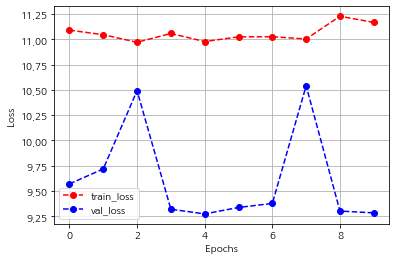

In [42]:
plt.plot(history_1.history['loss'], '--o', color = 'red', label = 'train_loss')
plt.plot(history_1.history['val_loss'], '--o', color = 'blue', label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [24]:
GJ_NET_MODEL.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 460us/step - loss: 9.9223


9.922258377075195

In [25]:
pred_Y = GJ_NET_MODEL.predict(test_X)
print(pred_Y[:10])

[[9.459807]
 [8.886728]
 [9.459807]
 [9.459807]
 [9.459807]
 [9.459807]
 [9.459807]
 [9.459807]
 [9.459807]
 [9.459807]]


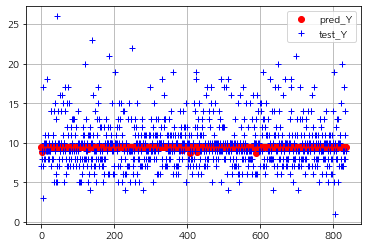

In [26]:
plt.plot(pred_Y[:], 'o', color ='red', label = 'pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label = 'test_Y')
plt.grid()
plt.legend()
plt.show()

In [27]:
###################################################은닉계층 다버리고 학습시켜보기##################################################

In [28]:
GJ_NET_MODEL_V2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape = (10,))
])

In [29]:
GJ_NET_MODEL_V2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),loss='mse')

In [30]:
GJ_NET_MODEL_V2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [31]:
history_2 = GJ_NET_MODEL_V2.fit(train_X, train_Y, epochs=25, batch_size = 32)

Epoch 1/25
105/105 [==============================] - 0s 377us/step - loss: 53.9577
Epoch 2/25
105/105 [==============================] - 0s 316us/step - loss: 10.4141
Epoch 3/25
105/105 [==============================] - 0s 336us/step - loss: 5.3372
Epoch 4/25
105/105 [==============================] - 0s 336us/step - loss: 5.1505
Epoch 5/25
105/105 [==============================] - 0s 316us/step - loss: 5.1826
Epoch 6/25
105/105 [==============================] - 0s 326us/step - loss: 5.0837
Epoch 7/25
105/105 [==============================] - 0s 336us/step - loss: 5.0450
Epoch 8/25
105/105 [==============================] - 0s 336us/step - loss: 5.0983
Epoch 9/25
105/105 [==============================] - 0s 326us/step - loss: 5.0198
Epoch 10/25
105/105 [==============================] - 0s 326us/step - loss: 5.0396
Epoch 11/25
105/105 [==============================] - 0s 336us/step - loss: 5.0085
Epoch 12/25
105/105 [==============================] - 0s 326us/step - loss: 5.0338

In [32]:
GJ_NET_MODEL_V2.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 384us/step - loss: 4.8169


4.816929340362549

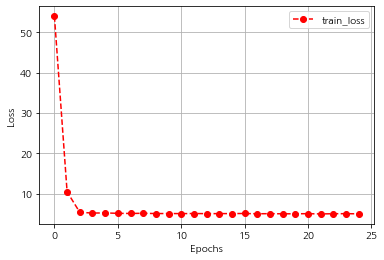

In [34]:
plt.plot(history_2.history['loss'], '--o', color = 'red', label = 'train_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [35]:
pred_Y = GJ_NET_MODEL_V2.predict(test_X)
print(pred_Y[:10])

[[ 8.122778 ]
 [ 8.745664 ]
 [ 9.014262 ]
 [14.688904 ]
 [ 3.882412 ]
 [ 6.3764606]
 [12.293568 ]
 [10.508714 ]
 [10.206242 ]
 [12.065241 ]]


In [36]:
print(test_Y[:10])

[[ 7.]
 [ 8.]
 [ 9.]
 [17.]
 [ 3.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [10.]]


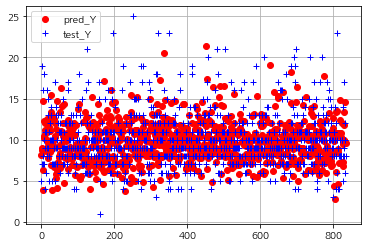

In [104]:
plt.plot(pred_Y[:], 'o', color = 'red', label = 'pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label = 'test_Y')
plt.legend()
plt.grid()
plt.show()

In [105]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y)/test_Y))
print(f'GJ_NET_MODEL_V2 - ACC {acc:.2f}%')

GJ_NET_MODEL_V2 - ACC 0.65%


In [74]:
df_mini = pd.read_csv('데이터셋/faults_mini.csv')

In [75]:
df_mini

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,42,270900,267,80,1,0,0
1,1084,185575,108,40,0,0,1
2,1109,1170194,130,175,0,1,0
3,190,210936,132,150,1,0,0
4,330,429227,264,150,1,0,0
5,74,779144,1506,150,1,0,0
6,51,585861,139,70,0,1,0
7,397,604478,444,70,0,1,0
8,43,366881,4048,40,0,0,1
9,48,377537,3985,40,0,0,1


In [76]:
mean = np.mean(df_mini, axis = 0)
std = np.std(df_mini, axis = 0)

In [77]:
print(std)
print(mean)

X_Minimum                   398.396486
Y_Minimum                286001.148814
Pixels_Areas               1509.547684
Steel_Plate_Thickness        50.992647
Pastry                        0.489898
Z_Scratch                     0.458258
K_Scatch                      0.458258
dtype: float64
X_Minimum                   336.8
Y_Minimum                498073.3
Pixels_Areas               1102.3
Steel_Plate_Thickness        96.5
Pastry                        0.4
Z_Scratch                     0.3
K_Scatch                      0.3
dtype: float64


In [78]:
df_mini -= mean

In [79]:
df_mini

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,-294.8,-227173.3,-835.3,-16.5,0.6,-0.3,-0.3
1,747.2,-312498.3,-994.3,-56.5,-0.4,-0.3,0.7
2,772.2,672120.7,-972.3,78.5,-0.4,0.7,-0.3
3,-146.8,-287137.3,-970.3,53.5,0.6,-0.3,-0.3
4,-6.8,-68846.3,-838.3,53.5,0.6,-0.3,-0.3
5,-262.8,281070.7,403.7,53.5,0.6,-0.3,-0.3
6,-285.8,87787.7,-963.3,-26.5,-0.4,0.7,-0.3
7,60.2,106404.7,-658.3,-26.5,-0.4,0.7,-0.3
8,-293.8,-131192.3,2945.7,-56.5,-0.4,-0.3,0.7
9,-288.8,-120536.3,2882.7,-56.5,-0.4,-0.3,0.7
